In [2]:
library(rethinking)
data(Howell1)
d <- Howell1

Loading required package: rstan
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Loading required package: StanHeaders
rstan (Version 2.18.2, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
Loading required package: dagitty
rethinking (Version 2.01)

Attaching package: ‘rethinking’

The following object is masked from ‘package:stats’:

    rstudent



In [3]:
precis(d)

,mean,sd,5.5%,94.5%,histogram
height,138.2635963,27.6024476,81.108550,165.73500,▁▁▁▁▁▁▁▂▁▇▇▅▁
weight,35.6106176,14.7191782,9.360721,54.50289,▁▂▃▂▂▂▂▅▇▇▃▂▁
age,29.3443934,20.7468882,1.000000,66.13500,▇▅▅▃▅▂▂▁▁
male,0.4724265,0.4996986,0.000000,1.00000,▇▁▁▁▁▁▁▁▁▇


In [4]:
d2 <- d[ d$age >= 18 , ]

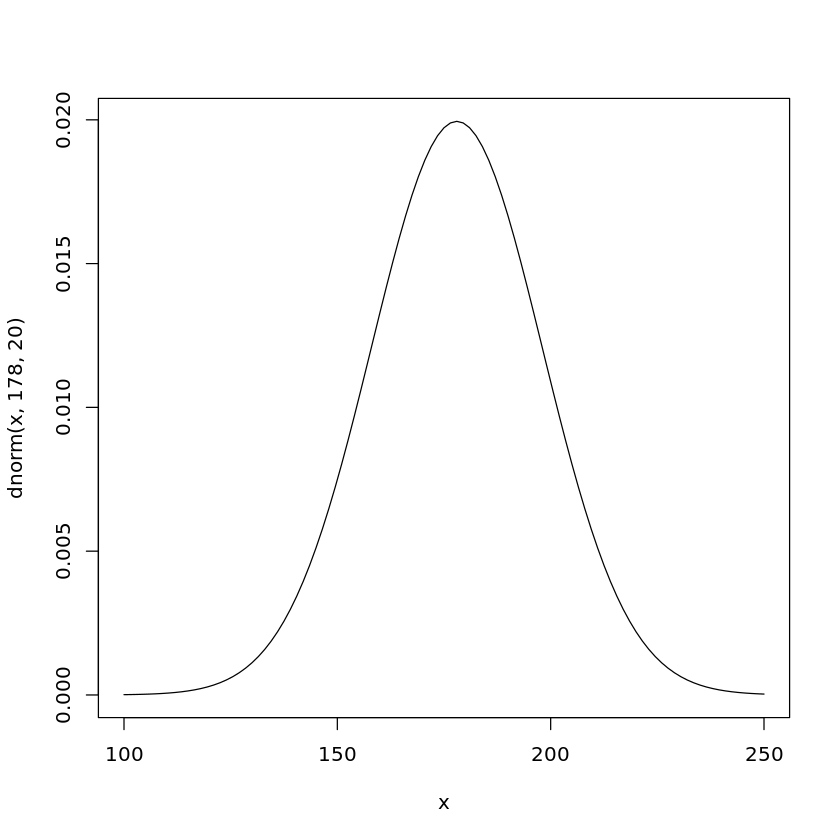

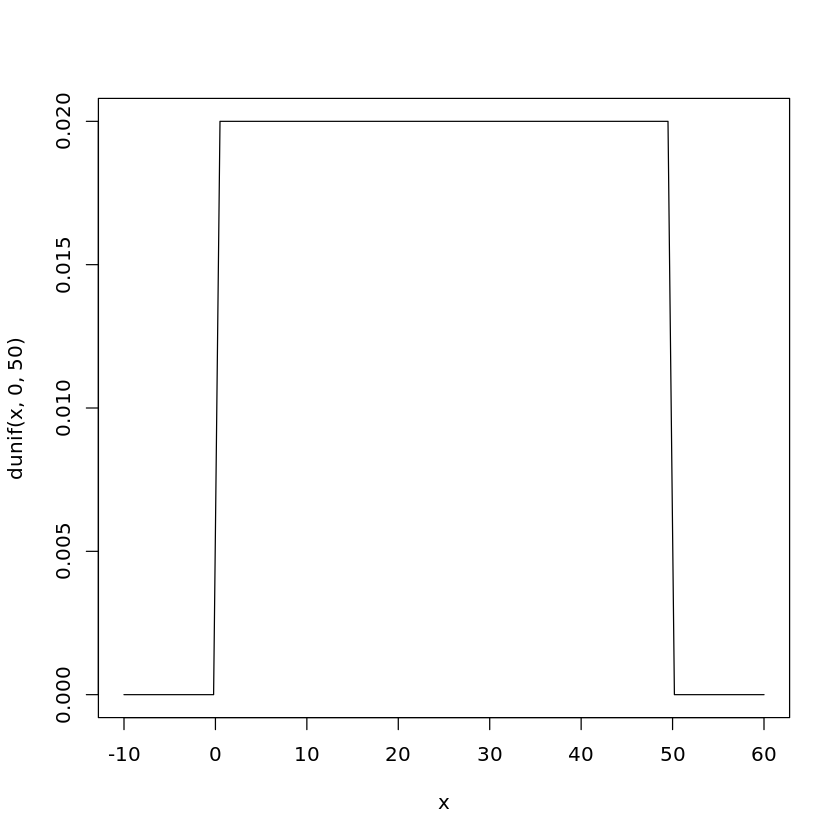

In [6]:
curve( dnorm( x , 178 , 20 ) , from=100 , to=250 )
curve( dunif( x , 0 , 50 ) , from=-10 , to=60 )

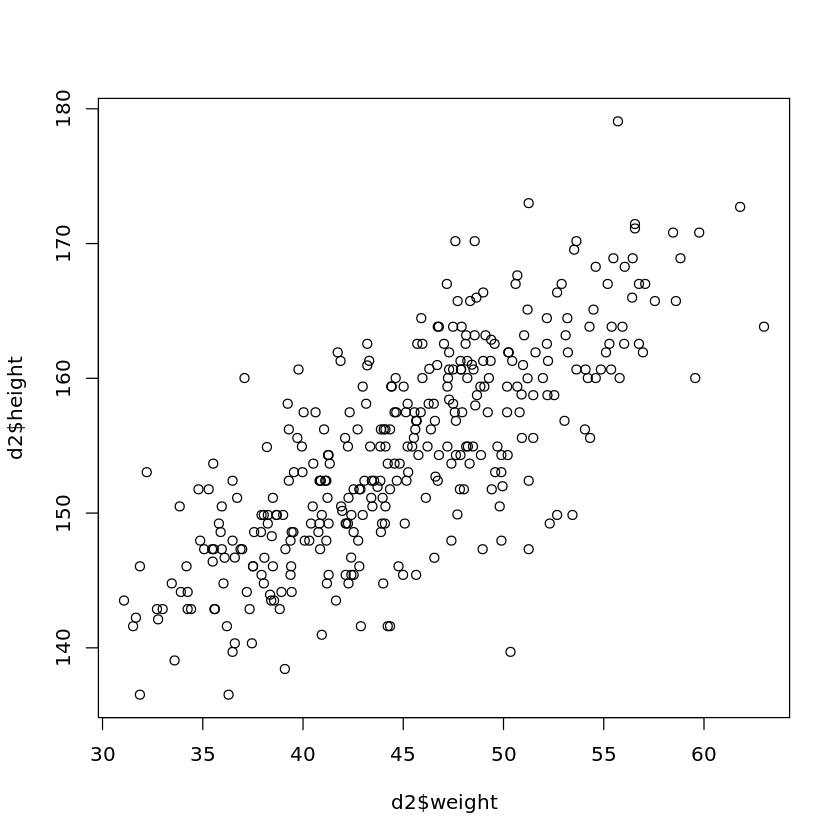

In [7]:
plot( d2$height ~ d2$weight )

In [13]:
# load data again, since it's a long way back
library(rethinking)
data(Howell1)
d <- Howell1
d2 <- d[d$age >= 18,]
# define the average weight, x-bar
xbar <- mean(d2$weight)
# fit model
m4.3a <- quap(
    alist(
        height ~ dnorm( mu , sigma ) ,
        mu <- a + b*( weight - xbar ) ,
        a ~ dnorm( 178 , 20 ) ,
        b ~ dlnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ),
data=d2)

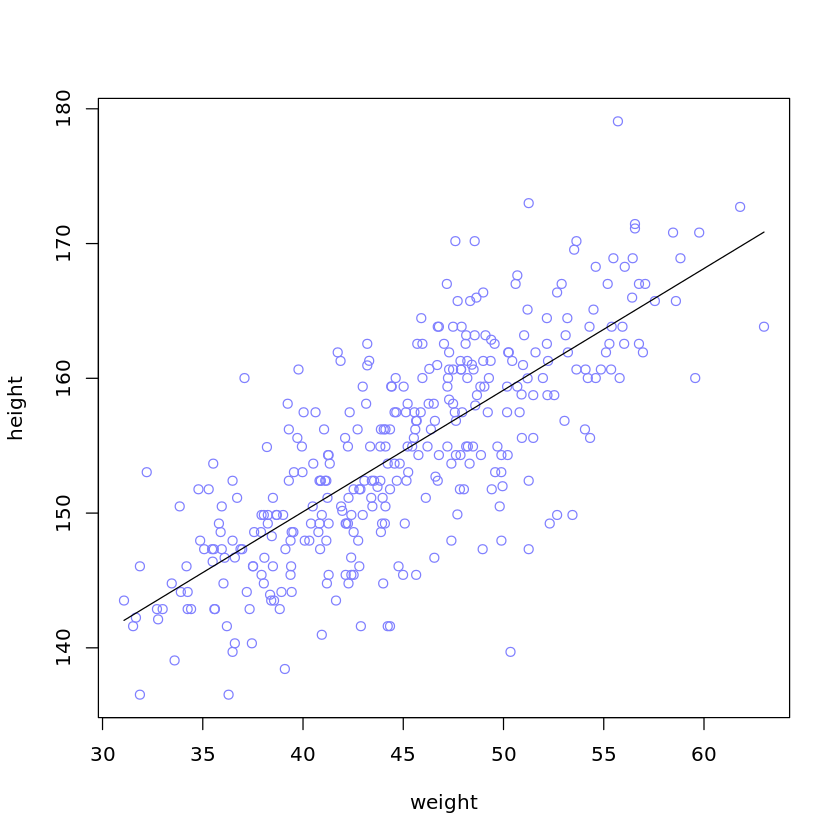

In [14]:
plot( height ~ weight , data=d2 , col=rangi2 )
post <- extract.samples( m4.3 )
a_map <- mean(post$a)
b_map <- mean(post$b)
curve( a_map + b_map*(x - xbar) , add=TRUE )

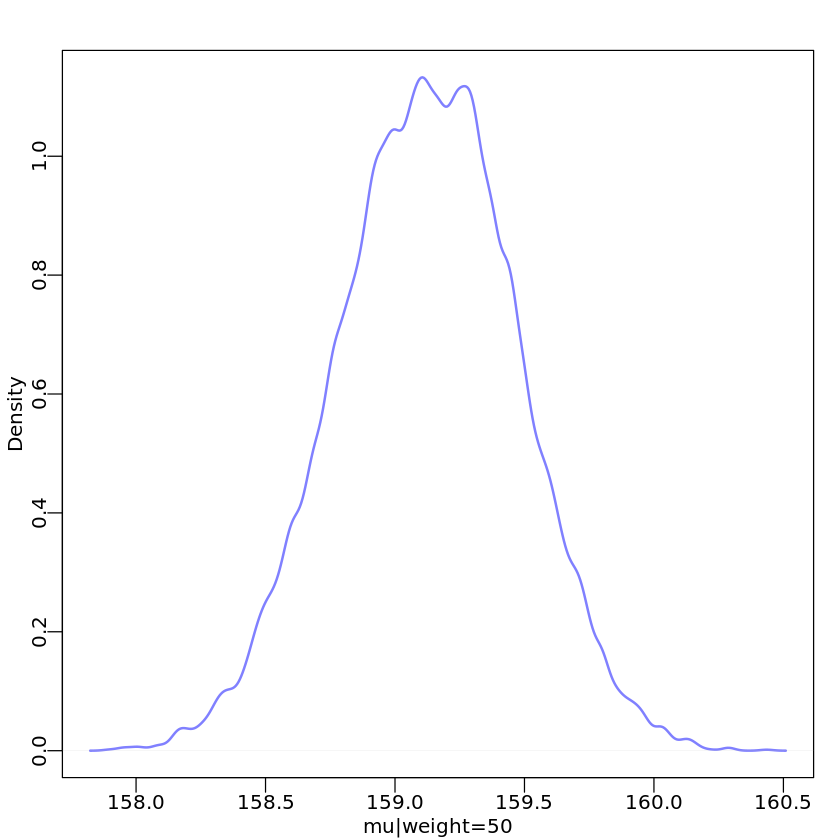

In [16]:
mu_at_50 <- post$a + post$b * ( 50 - xbar )
dens( mu_at_50 , col=rangi2 , lwd=2 , xlab="mu|weight=50" )

In [17]:
PI( mu_at_50 , prob=0.89 )

5%      94% 
158.5654 159.6721

In [30]:
weight.seq <- c(31, 40, 45, 53, 65)
mu <- link( m4.3 , data=data.frame(weight=weight.seq) )
str(mu)

 num [1:1000, 1:5] 137 139 137 138 138 ...


In [32]:
mu.mean <- apply( mu , 2 , mean )
mu.mean

[1] 138.1901 142.3449 144.2648 146.9320 150.2589

In [34]:
mu.PI <- apply( mu , 2 , PI , prob=0.89 )
mu.PI

5%,136.9172,140.9947,142.7768,145.2007,148.1877
94%,139.4840,143.7341,145.7671,148.6319,152.3166


### Exercise 2

In [28]:
data(Howell1)
d <- Howell1
d2 <- d
# define the average weight, x-bar
xbar <- mean(log(d2$weight))
# fit model
m4.3b <- quap(
    alist(
        height ~ dnorm(mu , sigma) ,
        mu <- a + b*(log(weight) - xbar) ,
        a ~ dnorm( 178 , 20 ) ,
        b ~ dlnorm( 0 , 1 ) ,
        sigma ~ dunif( 0 , 50 )
    ),
data=d2)

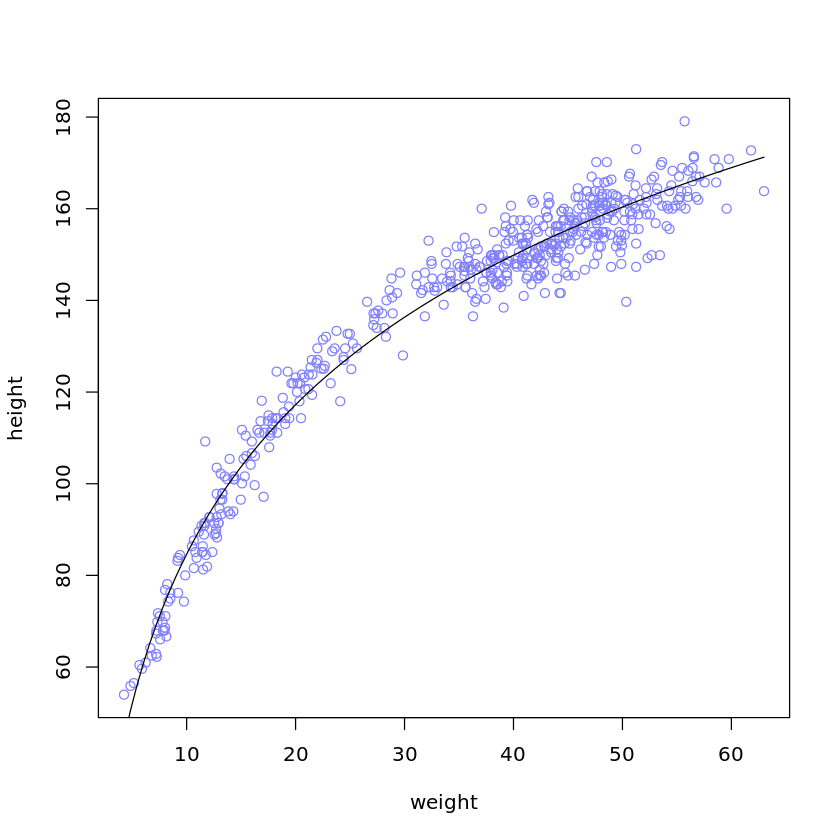

In [29]:
plot( height ~ weight , data=d2 , col=rangi2 )
post <- extract.samples( m4.3b )
a_map <- mean(post$a)
b_map <- mean(post$b)
curve( a_map + b_map*(log(x) - xbar) , add=TRUE )